On page 1 of 2...
Saved outputs/grids/grid_layout_9x7_01.png


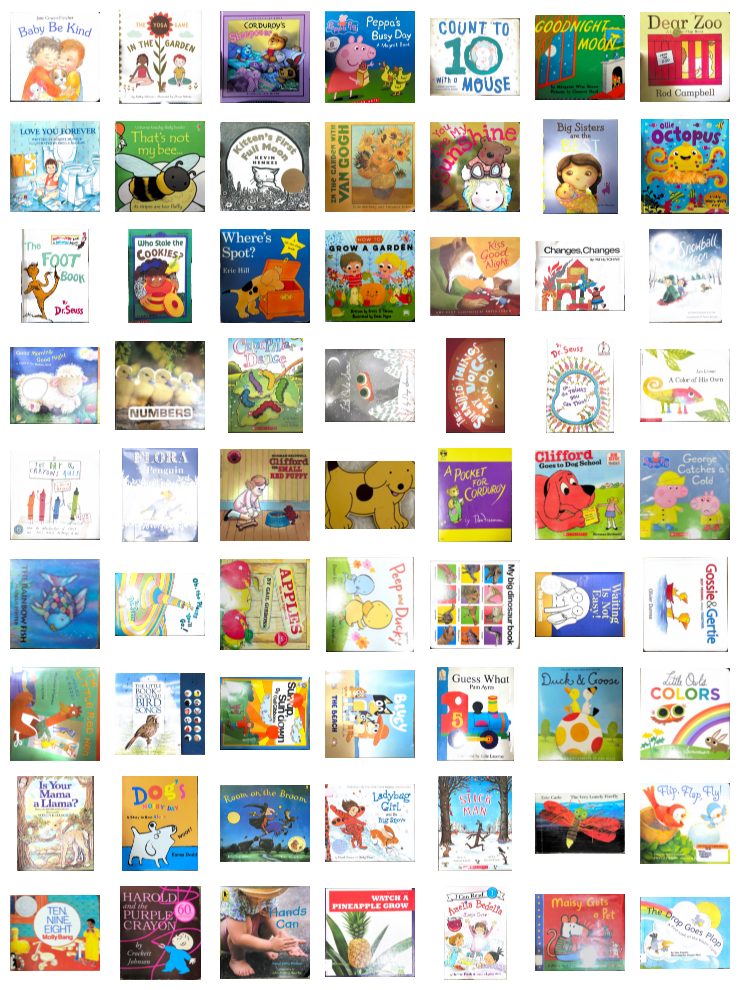

On page 2 of 2...
Saved outputs/grids/grid_layout_9x7_02.png


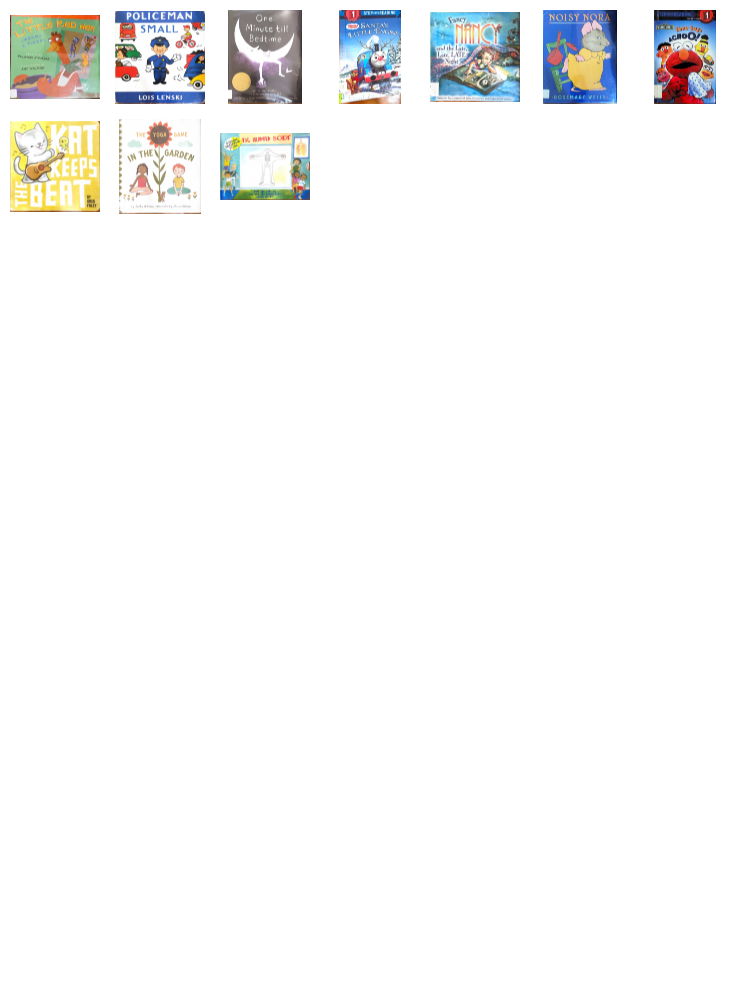

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PyPDF2 import PdfFileReader
import glob
import os

# File path
pdf_file_path = "covers.pdf"

# Output directory
outdir_chips = os.path.join("outputs", "jpg")
outdir_grid = os.path.join("outputs", "grids")
os.makedirs(outdir_chips, exist_ok=True)
os.makedirs(outdir_grid, exist_ok=True)

# Read the file
reader = PdfFileReader(pdf_file_path)

# Extract the pages
# I ripped this off from somewhere, can't remember where...
for i, page in enumerate(reader.pages):
    x_object = page["/Resources"]["/XObject"].getObject()
    for obj in x_object:
        if x_object[obj]["/Subtype"] == "/Image":
            size = (x_object[obj]["/Width"], x_object[obj]["/Height"])
            data = x_object[obj].getData()
            if x_object[obj]["/ColorSpace"] == "/DeviceRGB":
                mode = "RGB"
            else:
                mode = "P"

            outpath_root = os.path.join(outdir_chips, "img_%04d" % i)
            if x_object[obj]["/Filter"] == "/FlateDecode":
                outpath = outpath_root + ".png"
                img = Image.frombytes(mode, size, data)
                img.save(outpath)
            elif x_object[obj]["/Filter"] == "/DCTDecode":
                outpath = outpath_root + ".jpg"
                img = open(outpath, "wb")
                img.write(data)
                img.close()
            elif x_object[obj]["/Filter"] == "/JPXDecode":
                outpath = outpath_root + ".jp2"
                img = open(outpath, "wb")
                img.write(data)
                img.close()
                
# List of files that were exported
file_list = glob.glob(outdir_chips + "/*.jpg")
file_list.sort()
num_files = len(file_list)

# Grid dimensions
plt_rows = 9
plt_cols = 7

# Number of pages
plots_per_page = plt_rows * plt_cols
num_pages = int(np.ceil(num_files / plots_per_page))

# Iterate over pages
for page in range(num_pages):
    
    # Status
    print("On page %d of %d..." % (page+1, num_pages))
    
    # Output file name
    outname_page = "grid_layout_%dx%d_%02d.png" % (plt_rows, plt_cols, page+1)
    outpath_page = os.path.join(outdir_grid, outname_page)

    # Make the figure
    fig, axs = plt.subplots(plt_rows, plt_cols, figsize=(7.5, 10))
    axs = axs.flatten()
    for i, ax in enumerate(axs):
        idx = page * plots_per_page + i
        if idx < len(file_list):
            img = plt.imread(file_list[idx])
            rows, cols, chan = img.shape
            ax.imshow(img, interpolation="bicubic")
        ax.set_axis_off()

    # Format
    plt.tight_layout()
    fig.set_dpi(100)
    
    # Save the figure to disk
    fig.savefig(outpath_page)
    if os.path.isfile(outpath_page):
        print("Saved " + outpath_page)
    else:
        print("Warning: failed to save " + outpath_page)
    
    # Show the figure below
    plt.show()